In [153]:
import numpy as np
import heapq
import matplotlib.pyplot as plt
from matplotlib import colors

# 1. Make map

In [56]:
def make_map(size):
    direction = np.array([[1, 0], [0, 1]])
    direction2 = np.array([[1, 0], [0, 1], [-1, 0], [0, -1],
                           [1, 1], [-1, 1], [1, -1], [-1, -1]])
    m, n = size
    grid = np.zeros((m, n), dtype=int)

    present = np.array([0, 0])
    grid[present[0], present[1]] = 1
    while True:
        d = np.random.choice([0, 1])
        if present[0] + direction[d][0] >= m or present[1] + direction[d][1] >= n:
            break
        present[0] += direction[d][0]
        present[1] += direction[d][1]
        grid[present[0], present[1]] = 1
        for i in range(8):
            ni = present[0] + direction2[i][0]
            nj = present[1] + direction2[i][1]
            if ni < 0 or ni >= m or nj < 0 or nj >= n:
                continue
            grid[ni, nj] = 1

    return grid, tuple(present)

In [170]:
grid = np.array([
    [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
    [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
    [1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1],
    [1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1],
    [1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1],
    [1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1],
    [1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1],
    [1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1],
    [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
    [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
    [1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1]
])

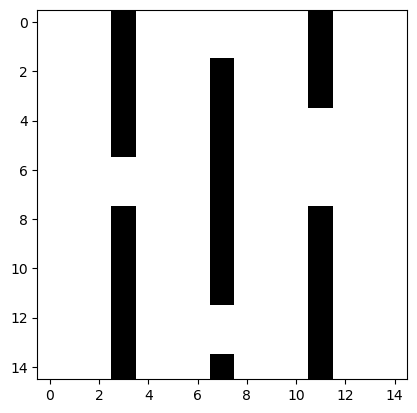

In [171]:
size = (15, 15)
#grid, goal = make_map(size)
plt.imshow(grid, cmap='gray')
plt.show()

# 2. A* Algorithm

Goal position: (14, 14)
Path found with length: 25
Number of Checking: 736


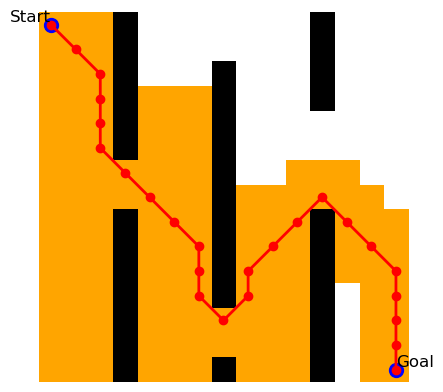

In [173]:
def heuristic(a, b):
    # Manhattan distance
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def astar(grid, start, goal):
    checking_point = set()
    count = 0

    m, n = grid.shape
    # Allowed moves: 8-directional
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1),
                  (-1, -1), (-1, 1), (1, -1), (1, 1)]
    
    open_set = []
    heapq.heappush(open_set, (heuristic(start, goal), 0, start, [start]))
    closed_set = set()

    while open_set:
        f, g, current, path = heapq.heappop(open_set)
        if current == goal:
            return path, count, checking_point
        if current in closed_set:
            continue
        closed_set.add(current)
        
        for dr, dc in directions:
            count = count + 1
            nr, nc = current[0] + dr, current[1] + dc
            neighbor = (nr, nc)
            # Check boundaries and whether the cell is traversable (value 1)
            if 0 <= nr < m and 0 <= nc < n and grid[nr, nc] == 1:
                checking_point.add(neighbor)
                if neighbor in closed_set:
                    continue
                new_cost = g + 1  # uniform cost for each move
                heapq.heappush(open_set, (new_cost + heuristic(neighbor, goal),
                                            new_cost, neighbor, path + [neighbor]))
                
    return None, count, checking_point # No path found

def plot_path(grid, path, start, goal, checking_point):
    m, n = grid.shape

    checking_map = np.zeros_like(grid)

    cmap = colors.ListedColormap(['black','white', 'orange'])

    for point in checking_point:
        checking_map[point[0],point[1]] = 1

    plt.imshow(checking_map + grid, cmap = cmap)
    if path:
        path_rows = [p[0] for p in path]
        path_cols = [p[1] for p in path]
        plt.plot(path_cols, path_rows, color='red', linewidth=2, marker='o')
    
    plt.scatter([start[1], goal[1]], [start[0], goal[0]], color='blue', s=100)
    plt.text(start[1], start[0], 'Start', color='black', fontsize=12,
             verticalalignment='bottom', horizontalalignment='right')
    plt.text(goal[1], goal[0], 'Goal', color='black', fontsize=12,
             verticalalignment='bottom', horizontalalignment='left')
    plt.axis('off')
    plt.show()

# Example usage:
start = (0, 0)
goal = (14,14)
path, count, checking_point = astar(grid, start, goal)

print("Goal position:", goal)
if path is not None:
    print("Path found with length:", len(path))
else:
    print("No path found.")

print("Number of Checking:", count)
plot_path(grid, path, start, goal, checking_point)

In [176]:
!ls

'IMEX Solver.ipynb'   data		      nohup.out
 baseline.ipynb       diffusion_model.ipynb   super_resolution_output.png
 cifar10	      models
